In [1]:
from PIL import Image

import requests

url = "http://images.cocodataset.org/test-stuff2017/000000000448.jpg"

image = Image.open(requests.get(url, stream=True).raw)

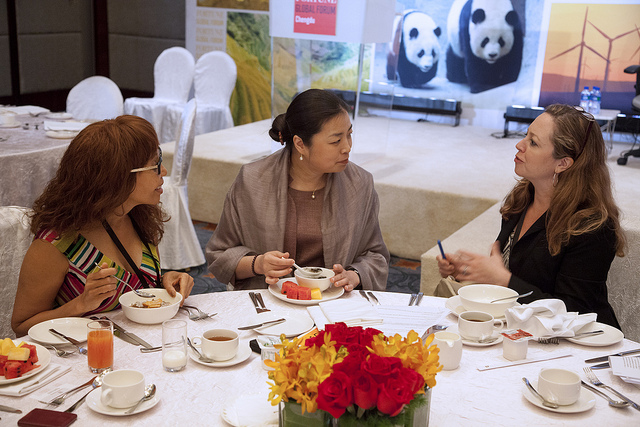

In [7]:
image

In [13]:
prompt = "a photo of a "

class_names = ["fighting", "meeting"]

inputs = [prompt + class_name for class_name in class_names]

In [4]:
from transformers import CLIPProcessor, CLIPModel

model = (CLIPModel

    .from_pretrained("openai/clip-vit-large-patch14"))

processor = (CLIPProcessor

    .from_pretrained("openai/clip-vit-large-patch14"))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [14]:
inputs = processor(text=inputs, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

logits = outputs.logits_per_image

probs = logits.softmax(dim=1)

In [15]:
probs

tensor([[4.5135e-04, 9.9955e-01]], grad_fn=<SoftmaxBackward0>)